#import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.preprocessing import StandardScaler

#import data

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
df = pd.read_csv('/content/winequality-white.csv',  sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#explorary data analysis

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


> the range are pretty far apart we need to scale it down

In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

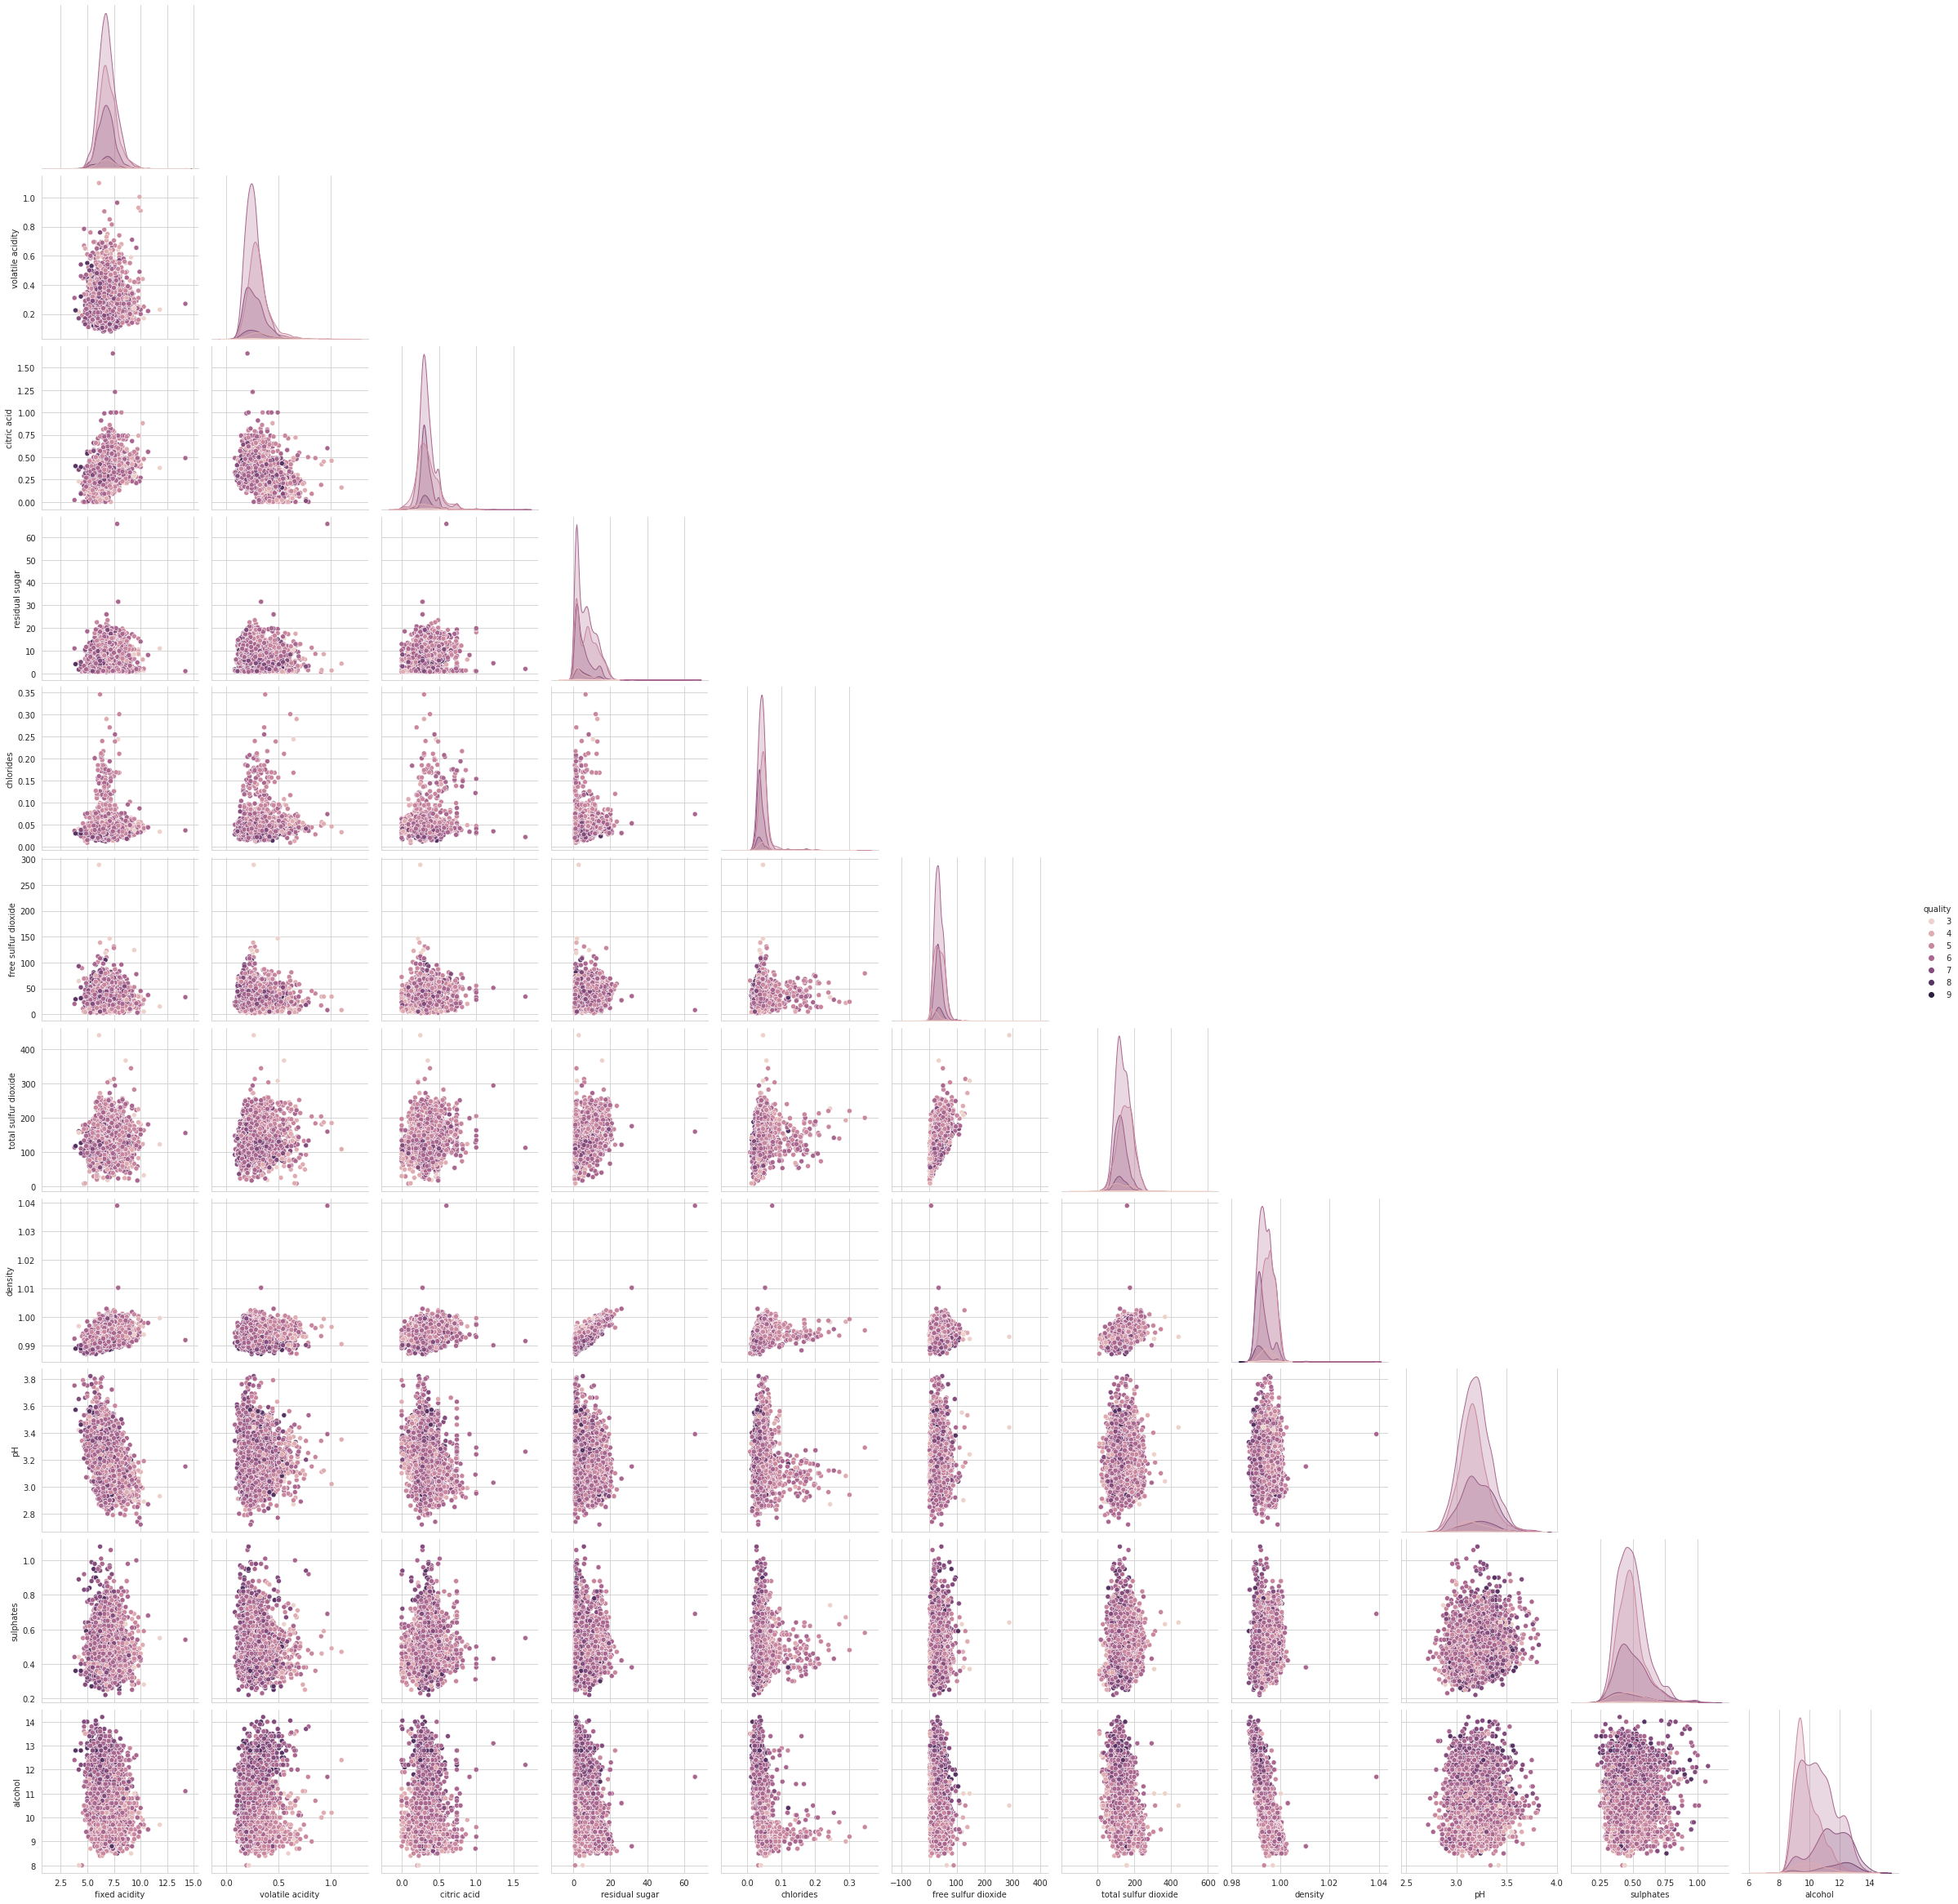

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="quality",height=3, corner=True);
plt.show()

> we can see that the data has similiar pattern we should be able to drop some.

In [ ]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

>the data also imbalanced we can use smote to make it balanced

In [ ]:
num_cols = ['fixed acidity' ,'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

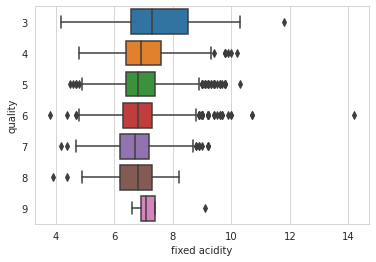

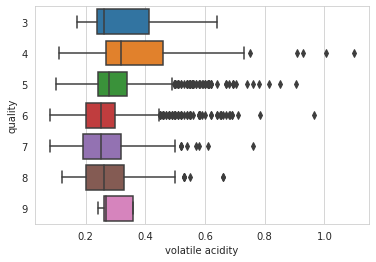

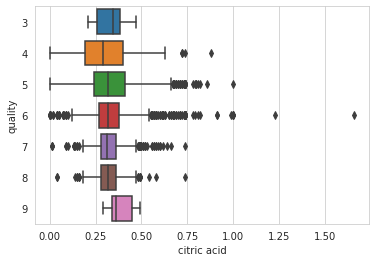

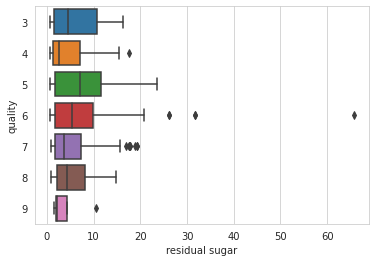

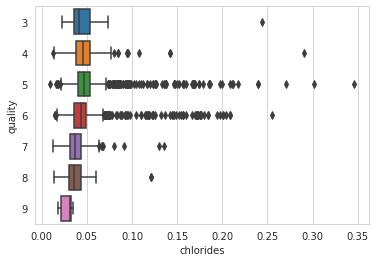

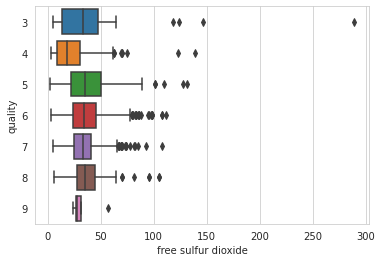

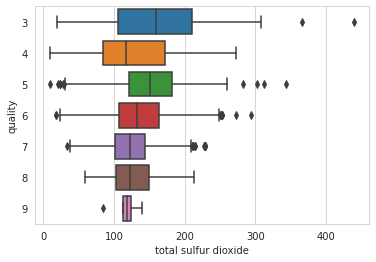

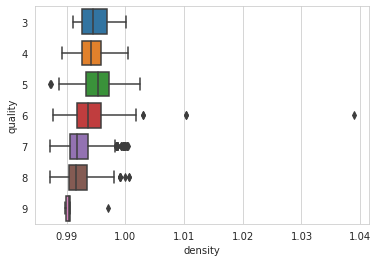

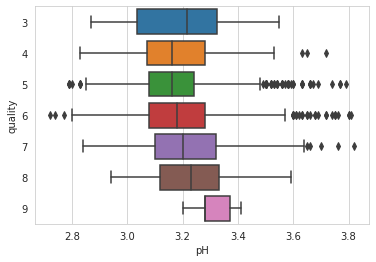

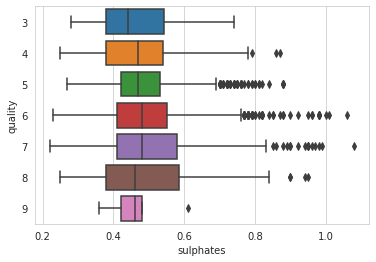

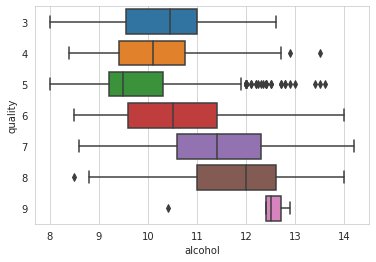

In [ ]:
for col in num_cols:
    sns.boxplot(y = df['quality'].astype('category'), x = col, data=df)
    plt.show()

>the data has a lot of outliar we should deal with those i will remove outliar.

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


> drop free sulfur dioxide, residual sugar

#preprocessing

>first we drop the data that we dont need. then also drop the outliar.

In [ ]:
drop_df = df.drop(['free sulfur dioxide', 'residual sugar'], axis=1)

>next we remove outliar

In [ ]:
drop_df = drop_df[(np.abs(stats.zscore(drop_df)) < 3).all(axis=1)]

>secondly we should split the data

In [ ]:
X = drop_df.drop('quality', axis=1)
y = drop_df.quality

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

> we now use SMOTE to balance the label

In [ ]:
smt = SMOTE(k_neighbors=3)

X_train, y_train = smt.fit_resample(X_train, y_train)

>last we scale down the data

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

#modelling

In [ ]:
!pip3 install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class KNN:

    def __init__(self, k, problem: int=0, metric: int=2):
        self.k = k
        self.problem = problem
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def calculateDistance(self, a ,b):
      # Store the number of dimensions
      dim = len(a)

      # Set initial distance to 0
      distance = 0

      # Calculate hamming distance
      if self.metric == -1:
        for n in range(dim):
          if a[n] != b[n]:
            distance += 1
      else:
        # Calculate other distances using parameter p if p == 1 its manhattan, 2 for euclidian and abritary for minkowski
        for d in range(dim):
            distance += abs(a[d] - b[d])**self.metric
            
        distance = distance**(1/self.metric)

      return distance

    def predict(self, X_test):
        import numpy as np
        from scipy import stats

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                d = self.calculateDistance(X_test[i,:], self.X_train[j,:])
                distance.append((d, y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            if self.problem == 0:
                y_pred.append(np.mean(neighbors))  # For Regression
            else:
                y_pred.append(stats.mode(neighbors)[0][0])  # For Classification
        return y_pred

In [ ]:
model = KNN(5, problem=1, metric=2)
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, pred)

0.4728682170542636

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, roc_auc_score

In [ ]:
models =  { "Decision Tree" : DecisionTreeClassifier(),
            "RandomForest" : RandomForestClassifier(random_state=7),
            "XGBoost" : XGBClassifier(), 
            "LogisticRegression" : LogisticRegression(max_iter=500), 
            "CatBoost" :CatBoostClassifier() ,
            'LGBM' : LGBMClassifier(),
            'KNN' : KNeighborsClassifier(),
            'ADA' : AdaBoostClassifier(),
            }

scores = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1',])


for model in models:
  classifier = models[model]
  classifier.fit(X_train, y_train)
  predicts = classifier.predict(X_val)

  
  scores = scores.append(pd.Series({
                 'Model' : model,
                 'Accuracy' : accuracy_score(y_val, predicts),
                 'F1' : f1_score(y_val, predicts, average ='weighted'),
                 'Precision' : precision_score(y_val, predicts, average ='weighted'),
                 'Recall' : recall_score(y_val, predicts, average ='weighted'),

  }),ignore_index=True)

In [ ]:
scores

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.566999,0.594079,0.566999,0.576733
1,RandomForest,0.655592,0.656794,0.655592,0.655646
2,XGBoost,0.673311,0.670562,0.673311,0.669137
3,LogisticRegression,0.349945,0.472822,0.349945,0.375686
4,CatBoost,0.625692,0.626649,0.625692,0.625857
5,LGBM,0.627907,0.630481,0.627907,0.627359
6,KNN,0.495017,0.560663,0.495017,0.512409
7,ADA,0.306755,0.438135,0.306755,0.331874


> as we can see the best model for this part of task are xgboost

> now we will do some parameter tuning to make sure this is the best model.

In [ ]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import warnings

In [ ]:
space = {
    'max_depth' : hp.choice('max_depth', range(5, 30, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(20, 205, 5)),
    'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}

In [ ]:
def objective(space):

    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    classifier = XGBClassifier(n_estimators = space['n_estimators'],
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            gamma = space['gamma'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree']
                            )
    
    classifier.fit(X_train, y_train)

    
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    CrossValMean = accuracies.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }

In [ ]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best)

CrossValMean:
0.7905109489051094
CrossValMean:
0.6683698296836983
CrossValMean:
0.8251824817518247
CrossValMean:
0.7996350364963504
CrossValMean:
0.8277372262773722
CrossValMean:
0.821411192214112
CrossValMean:
0.831508515815085
CrossValMean:
0.8231143552311435
CrossValMean:
0.8060827250608271
CrossValMean:
0.8479318734793189
CrossValMean:
0.7959854014598541
CrossValMean:
0.7658150851581509
CrossValMean:
0.7632603406326034
CrossValMean:
0.8427007299270073
CrossValMean:
0.661800486618005
CrossValMean:
0.8148418491484184
CrossValMean:
0.6654501216545012
CrossValMean:
0.839537712895377
CrossValMean:
0.7969586374695864
CrossValMean:
0.8357664233576643
CrossValMean:
0.8447688564476884
CrossValMean:
0.8538929440389295
CrossValMean:
0.8489051094890512
CrossValMean:
0.8465936739659365
CrossValMean:
0.8549878345498783
CrossValMean:
0.8546228710462287
CrossValMean:
0.8583941605839417
CrossValMean:
0.8562043795620438
CrossValMean:
0.8502433090024331
CrossValMean:
0.8425790754257909
CrossValMean:


In [ ]:
classifier = XGBClassifier(n_estimators = best['n_estimators'],
                            max_depth = best['max_depth'],
                            learning_rate = best['learning_rate'],
                            gamma = best['gamma'],
                            min_child_weight = best['min_child_weight'],
                            subsample = best['subsample'],
                            colsample_bytree = best['colsample_bytree']
                            )

classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.74, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.17, max_delta_step=0, max_depth=20,
              min_child_weight=1.0, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.86,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = classifier.predict(X_val)

#evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cf_matrix = confusion_matrix(y_val, pred)

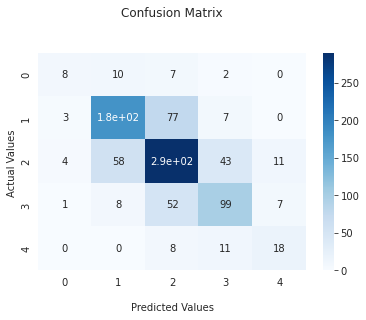

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           4       0.50      0.30      0.37        27
           5       0.70      0.67      0.69       266
           6       0.67      0.71      0.69       406
           7       0.61      0.59      0.60       167
           8       0.50      0.49      0.49        37

    accuracy                           0.66       903
   macro avg       0.60      0.55      0.57       903
weighted avg       0.66      0.66      0.66       903

